# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [2]:
!pip install ucimlrepo

In [3]:
# 1.1 Carga del dataset y exploración de datos

from ucimlrepo import fetch_ucirepo


auto_mpg = fetch_ucirepo(id=9)


X = auto_mpg.data.features
y = auto_mpg.data.targets

print("Features (X):")
print(X.head())


print("\nTarget (y):")
print(y.head())


print("\nValori nulli nelle features:")
print(X.isnull().sum())

Features (X):
   displacement  cylinders  horsepower  weight  acceleration  model_year  \
0         307.0          8       130.0    3504          12.0          70   
1         350.0          8       165.0    3693          11.5          70   
2         318.0          8       150.0    3436          11.0          70   
3         304.0          8       150.0    3433          12.0          70   
4         302.0          8       140.0    3449          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  

Target (y):
    mpg
0  18.0
1  15.0
2  18.0
3  16.0
4  17.0

Valori nulli nelle features:
displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [4]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [5]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


En este punto, puedes hacer cualquier otro análisis exploratorio que creas conveniente.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB
None

Resumen estadístico:
       displacement   cylinders  horsepower       weight  acceleration  \
count    398.000000  398.000000  392.000000   398.000000    398.000000   
mean     193.425879    5.454774  104.469388  2970.424623     15.568090   
std      104.269838    1.701004   38.491160   846.841774      2.757689   
min       68.000000    3.000000   46.000000  1613.000000      8.000000   
25%      104.25000

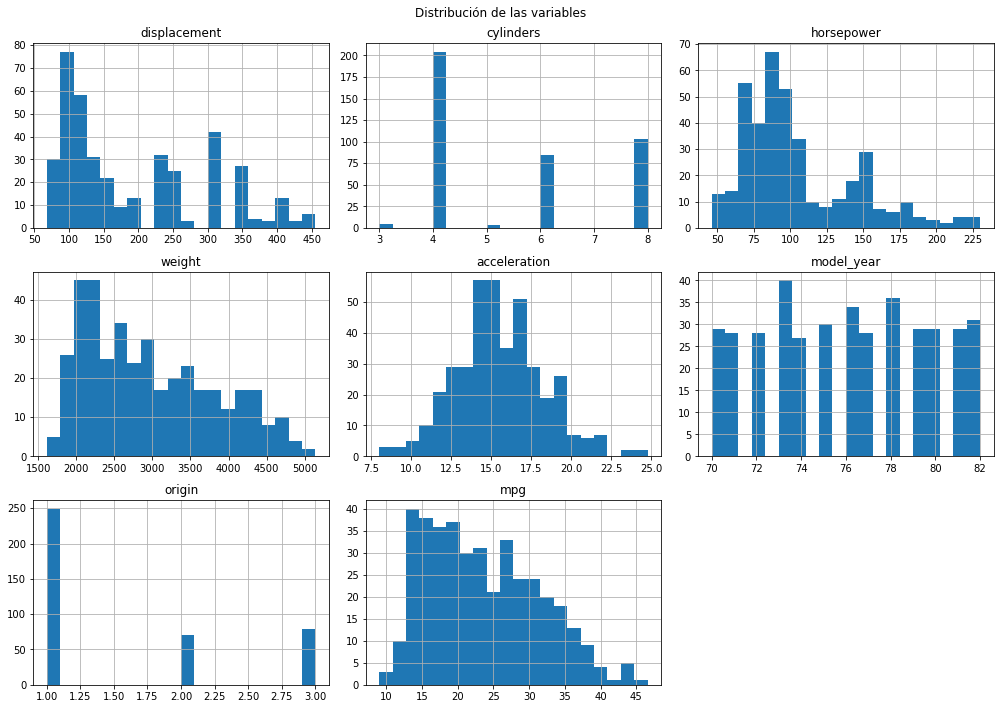

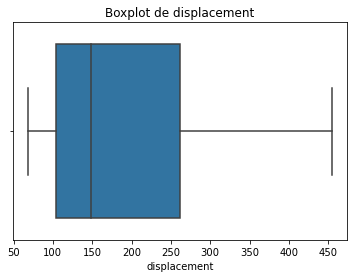

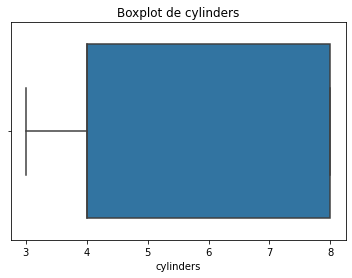

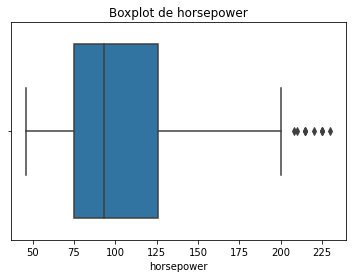

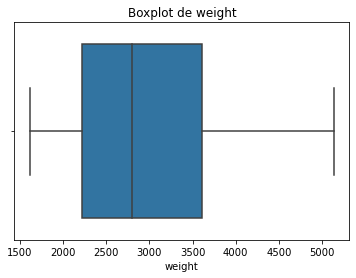

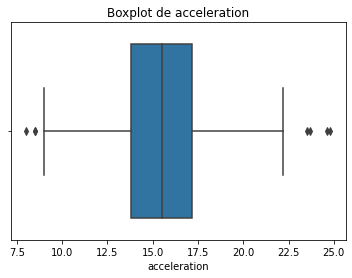

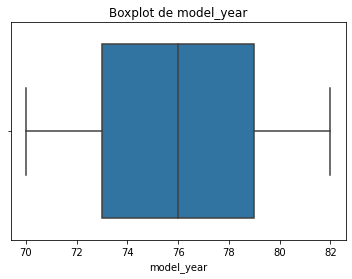

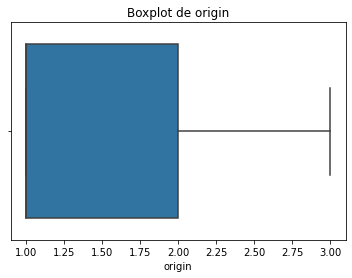

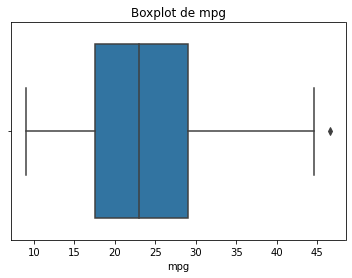

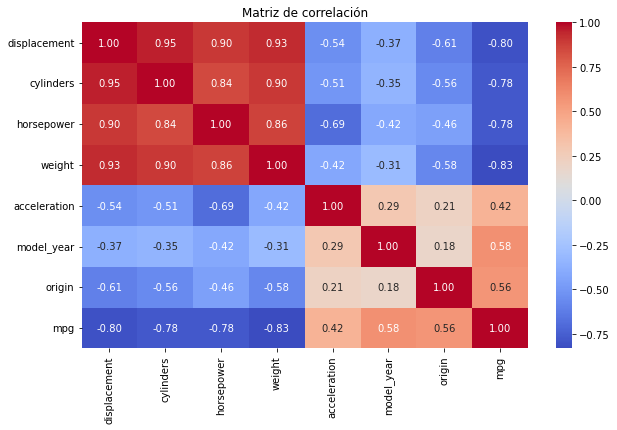

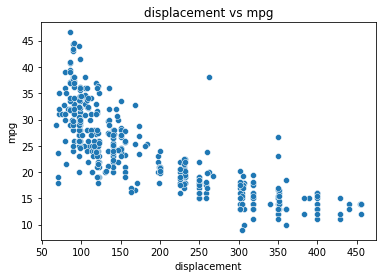

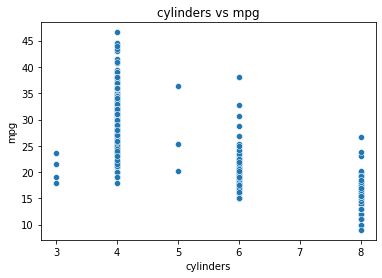

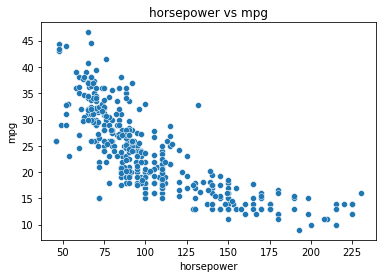

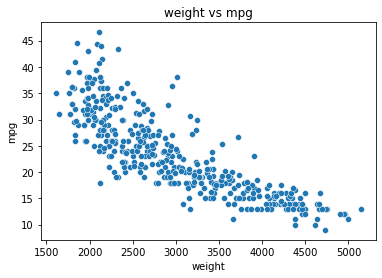

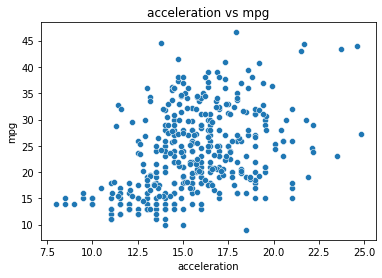

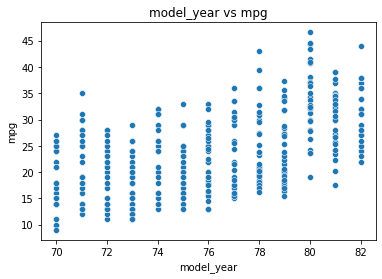

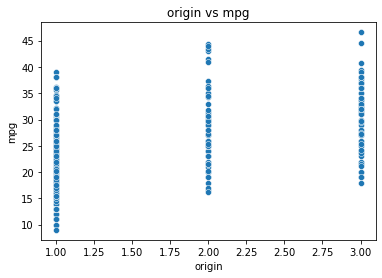

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis exploratorio de datos ##################################
X = X.copy()
X["mpg"] = y  # añadimos el target para análisis conjunto

# Información general
print(X.info())
print("\nResumen estadístico:")
print(X.describe())

# Valores nulos
print("\nValores nulos por columna:")
print(X.isnull().sum())

# Valores únicos
print("\nValores únicos por columna:")
print(X.nunique())

# Histograma de todas las variables
X.hist(bins=20, figsize=(14, 10))
plt.suptitle("Distribución de las variables")
plt.tight_layout()
plt.show()

# Boxplots
for col in X.columns:
    plt.figure()
    sns.boxplot(x=X[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# Dispersión con el target (mpg)
for col in X.columns[:-1]:  # sin "mpg"
    plt.figure()
    sns.scatterplot(x=X[col], y=X["mpg"])
    plt.xlabel(col)
    plt.ylabel("mpg")
    plt.title(f"{col} vs mpg")
    plt.show()



A continuación, crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo, pero usa los parámetros que quieras en cuanto a color de los puntos, grids etc.

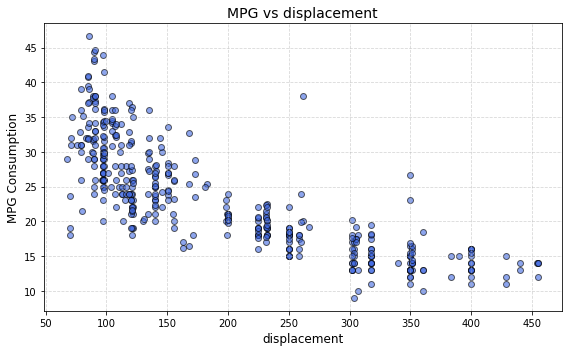

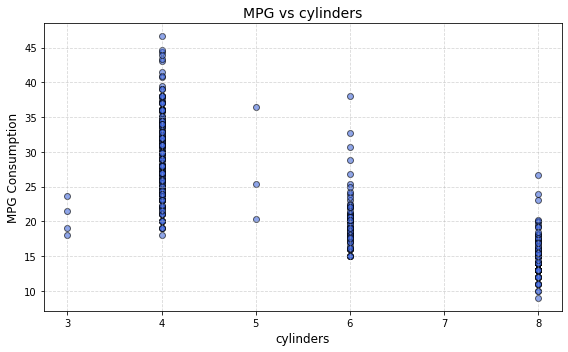

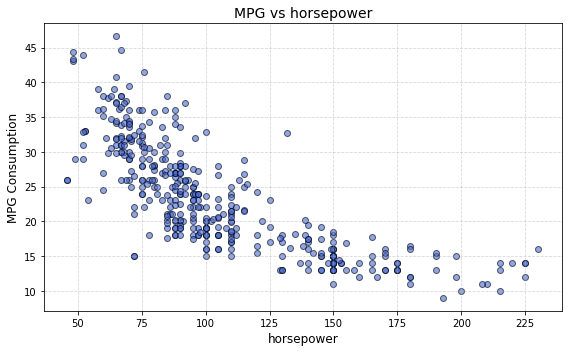

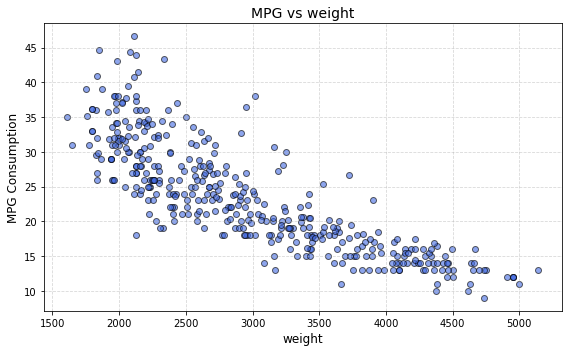

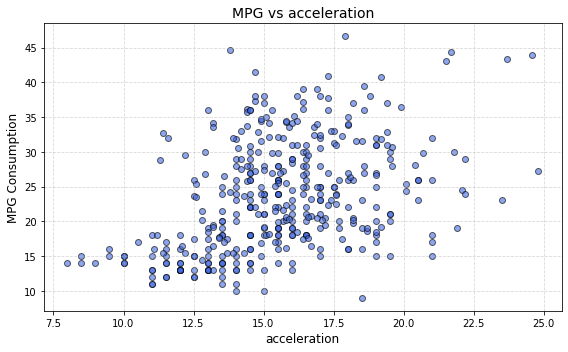

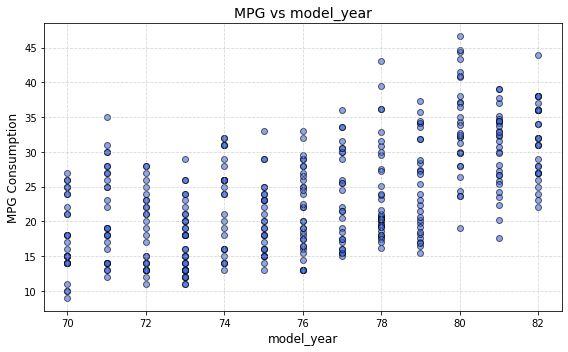

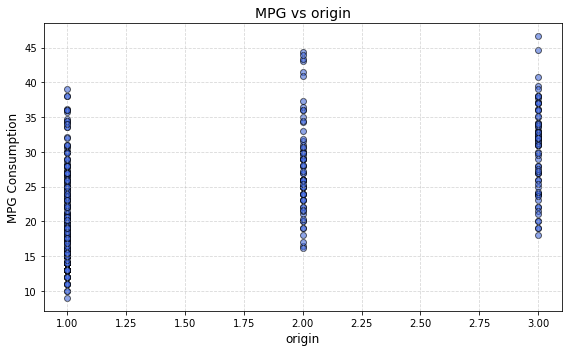

In [7]:

import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    if nombre_columna not in df.columns:
        print(f"Error: la columna '{nombre_columna}' no existe en el DataFrame.")
        return
    
    plt.figure(figsize=(8, 5))
    plt.scatter(df[nombre_columna], y, color='royalblue', alpha=0.6, edgecolor='k')
    plt.xlabel(nombre_columna, fontsize=12)
    plt.ylabel('MPG Consumption', fontsize=12)
    plt.title(f'MPG vs {nombre_columna}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
for col in X.columns:
    if col != "mpg":  # evitamos graficar mpg vs mpg
        visualiza(X, X["mpg"], col)

IMPORTANTE: Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

En este punto vamos a dar un paso atrás y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar serviría para cualquier conjunto de datos.

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [8]:
import numpy as np

def pesos_ols(X, y):
    # Aseguramos que X es 2D
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    # Transponer si hay más features que observaciones
    if X.shape[0] < X.shape[1]:
        X = X.T

    # Añadimos columna de unos (bias)
    ones = np.ones((X.shape[0], 1))
    X_b = np.hstack([ones, X])

    # Aplicamos fórmula de mínimos cuadrados
    XtX = np.dot(X_b.T, X_b)
    XtX_inv = np.linalg.inv(XtX)
    Xty = np.dot(X_b.T, y)
    w = np.dot(XtX_inv, Xty)

    return w

In [9]:

Z = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
k = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(Z, k)

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

Hemos implementado el algoritmo de mínimos cuadrados y lo hemos probado en un array de tamaño 2x10. Como pista, el resultado que he obtenido para este array de prueba es el siguiente:

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

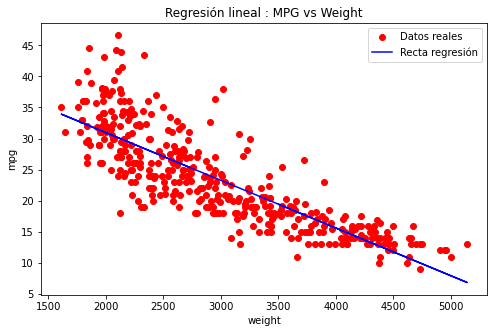

Punto de corte: [46.31736442]
Pendiente: [-0.00767661]


In [10]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

X_weight = X[['weight']].to_numpy()
y_mpg = y.to_numpy()

w = pesos_ols(X_weight, y_mpg)
y_pred = w[0] + w[1] * X_weight

plt.figure(figsize=(8, 5))
plt.scatter(X_weight, y_mpg, color='red', label='Datos reales')
plt.plot(X_weight, y_pred, color='blue', label='Recta regresión')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('Regresión lineal : MPG vs Weight')
plt.legend()
plt.show()
print("Punto de corte:", w[0])
print("Pendiente:", w[1])

Por último, vamos a comparar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

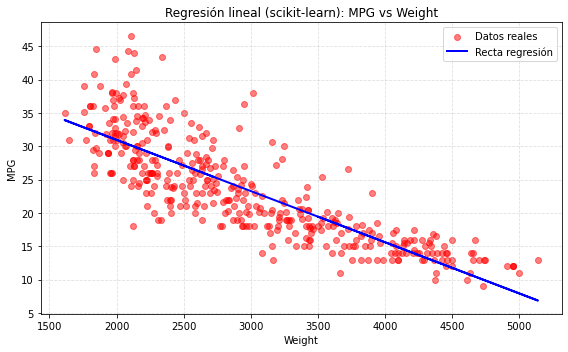

Punto de corte: 46.31736442026565
Pendiente: [-0.00767661]


In [11]:

from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

#X_lr = X[['weight']]
#y_lr = y
X_lr = X[['weight']].to_numpy()
y_lr = y.to_numpy().flatten()

# Entrenamos con los datos
lr.fit(X_lr,y_lr)

# Predicciones
y_pred = lr.predict(X_lr)

# Gráfico
plt.figure(figsize=(8, 5))
plt.scatter(X_lr, y_lr, color='red', alpha=0.5, label='Datos reales')
plt.plot(X_lr, y_pred, color='blue', linewidth=2, label='Recta regresión')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Regresión lineal (scikit-learn): MPG vs Weight')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

In [12]:
# Construir una tabla comparativa con los resultados de los dos modelos
tabla = pd.DataFrame({
    "Método": ["pesos_ols", "scikit-learn"],
    "Intercepto": [w[0], lr.intercept_],
    "Pendiente": [w[1], lr.coef_[0]]
})

print("📊 Comparación de coeficientes:")
print(tabla.to_string(index=False))

# Comparación con tolerancia
if np.allclose([float(w[0]), float(w[1])], [lr.intercept_, lr.coef_[0]], atol=1e-10):
    print("\n✅ Los resultados coinciden exactamente. La implementación de mínimos cuadrados es correcta.")
else:
    print("\n⚠️ Hay diferencias. Revisar la implementación.")

📊 Comparación de coeficientes:
      Método          Intercepto               Pendiente
   pesos_ols [46.31736442026573] [-0.007676610063926503]
scikit-learn           46.317364               -0.007677

✅ Los resultados coinciden exactamente. La implementación de mínimos cuadrados es correcta.


### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal




Los mínimos cuadrados usan una fórmula para sacar los resultados directamente.  
Es rápido y da un resultado exacto si los datos están bien.

El descenso del gradiente va poco a poco, probando hasta encontrar una buena solución.  
Es más lento, pero sirve cuando no se puede usar la fórmula.

## 2. Optimización con descenso del gradiente

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [13]:
def gradient_descent(X, y, w0, n_iter, eta):
    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0

    # TODO 1: añadimos columna de unos
    ones = np.ones((X.shape[0], 1))
    X_b = np.hstack([ones, X])

    # TODO 2: bucle de iteraciones
    for _ in range(n_iter):
        # TODO 3: cálculo del error y actualización
        y_pred = X_b @ w
        error = y_pred - y
        loss = (1/2) * np.mean(error**2)
        gradient = X_b.T @ error / len(y)
        w = w - eta * gradient

        # añadimos resultados
        loss_iter.append(loss)
        w_iter.append(w)

    return np.array(w_iter), np.array(loss_iter)


eta = 0.01 
iteraciones = 2000 

np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

print(weights[-1])

[[183695.36963666]
 [ 40682.97678324]]


### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [14]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

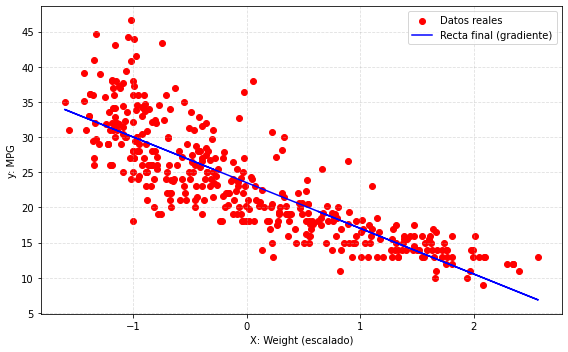

In [15]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x 

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# Inicialización aleatoria
np.random.seed(123)
w0 = np.random.rand(2).reshape((2, 1))  # 2 pesos: bias + slope

# Ejecutar descenso del gradiente
eta = 0.01
iteraciones = 2000
weights, loss = gradient_descent(X_gd, y_gd.reshape(-1, 1), w0, iteraciones, eta)

# Extraer pesos finales
w_final = weights[-1]
w0_final, w1_final = float(w_final[0]), float(w_final[1])

# Predicción
y_pred = w0_final + w1_final * X_np.flatten()



# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1


# TODO 3 Dibuja la gráfica
w0, w1 = weights[-1][0], weights[-1][1]
y_pred = w0 + w1 * X_gd

# Gráfico
plt.figure(figsize=(8, 5))
plt.scatter(X_gd, y_gd, color='red', label='Datos reales')
plt.plot(X_gd, y_pred, color='blue', label='Recta final (gradiente)')
plt.xlabel('X: Weight (escalado)')
plt.ylabel('y: MPG')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [16]:
# Comparación entre los tres modelos ##################################

# Recalcular pesos mínimos cuadrados con X_gd
w = pesos_ols(X_gd, y_gd)

# Recalcular modelo sklearn con X_gd
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_gd, y_gd)

# Extraer coeficientes del descenso del gradiente
w_final = weights[-1]
w0_final, w1_final = float(w_final[0]), float(w_final[1])

# Asegurar que los coeficientes de mínimos cuadrados están en float
intercepto_ols = float(w[0])
pendiente_ols = float(w[1])

# Extraer coeficientes de sklearn
intercepto_skl = float(lr.intercept_)
pendiente_skl = float(lr.coef_[0])

# Crear tabla comparativa
tabla_comparacion = pd.DataFrame({
    "Método": ["Descenso Gradiente", "Mínimos Cuadrados", "Scikit-Learn"],
    "Intercepto": [w0_final, intercepto_ols, intercepto_skl],
    "Pendiente": [w1_final, pendiente_ols, pendiente_skl]
})

print("📊 Comparación de coeficientes (sobre X escalado):")
print(tabla_comparacion.to_string(index=False))

# Comparación numérica
if (np.allclose([w0_final, w1_final], [intercepto_ols, pendiente_ols], atol=1e-3) and
    np.allclose([w0_final, w1_final], [intercepto_skl, pendiente_skl], atol=1e-3)):
    print("\n✅ Todos los modelos coinciden (diferencias menores a 0.001).")
else:
    print("\n⚠️ Hay diferencias significativas entre los métodos.")

📊 Comparación de coeficientes (sobre X escalado):
            Método  Intercepto  Pendiente
Descenso Gradiente   23.514573  -6.492702
 Mínimos Cuadrados   23.514573  -6.492702
      Scikit-Learn   23.514573  -6.492702

✅ Todos los modelos coinciden (diferencias menores a 0.001).


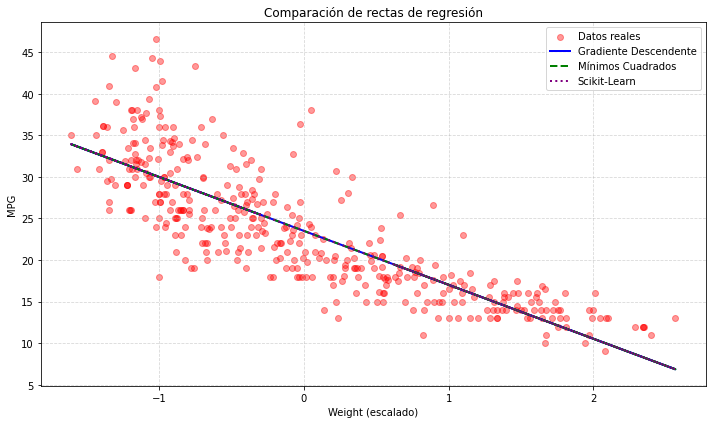

In [17]:
# Gráfico comparativo de los tres modelos
# Predicciones de cada modelo sobre X_gd
y_pred_gd = w0_final + w1_final * X_gd.flatten()
y_pred_ols = intercepto_ols + pendiente_ols * X_gd.flatten()
y_pred_skl = intercepto_skl + pendiente_skl * X_gd.flatten()

# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X_gd, y_gd, color='red', alpha=0.4, label='Datos reales')

plt.plot(X_gd, y_pred_gd, color='blue', linewidth=2, label='Gradiente Descendente')
plt.plot(X_gd, y_pred_ols, color='green', linestyle='--', linewidth=2, label='Mínimos Cuadrados')
plt.plot(X_gd, y_pred_skl, color='purple', linestyle=':', linewidth=2, label='Scikit-Learn')

plt.xlabel('Weight (escalado)')
plt.ylabel('MPG')
plt.title('Comparación de rectas de regresión')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()